## EDA

In [ ]:
!pip install psycopg2-binary

In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import helper_db as db


In [2]:
print(db.connect_to_db())

<cursor object at 0x7f8e2001f400; closed: 0>


### Question 1: For a given city/country, what is the trend of their average temperature?

In [19]:
cursor = db.connect_to_db()

In [20]:
cursor.execute("SELECT * FROM import.globaltemperaturesbycountry where country = 'Afghanistan';")

In [21]:
afghanistan_data = cursor.fetchall()

In [22]:
df_country_0 = pd.DataFrame(afghanistan_data, columns=[desc[0] for desc in cursor.description])

In [23]:
df_country = df_country_0.copy()
df_country['country'] = df_country['country'].str.strip()
df_country.sample(10)

,dt,averagetemperature,averagetemperatureuncertainty,country
2013,2007-02-01,4.9830000000000005,0.29600000000000004,Afghanistan
1573,1970-06-01,25.226,0.287,Afghanistan
919,1914-11-01,8.777999999999999,1.268,Afghanistan
997,1921-05-01,19.392,0.919,Afghanistan
868,1910-08-01,24.926,0.679,Afghanistan
1221,1940-01-01,2.68,0.6659999999999999,Afghanistan
2012,2007-01-01,1.215,0.755,Afghanistan
1352,1950-12-01,-0.15600000000000014,0.311,Afghanistan
347,1867-03-01,8.872000000000002,2.358,Afghanistan
490,1879-02-01,4.508,1.153,Afghanistan


<AxesSubplot:title={'center':'Average Temperature of Afghanistan (by year)'}, xlabel='year'>

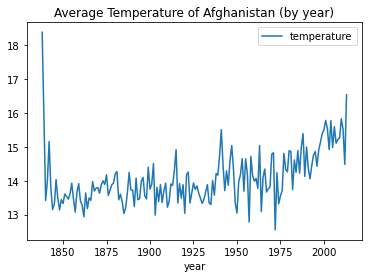

In [24]:
country = 'Afghanistan'
# df_country = df_country[df_country['country'] == country].sort_values(by=['dt'], ascending=True)
df_country = df_country.replace(to_replace='', value = np.nan,regex=True)
df_country = df_country.dropna()
df_country['year'] = df_country['dt'].str[:4].astype(int)
df_country['averagetemperature'] = df_country['averagetemperature'].astype(float)
df_country['temperature'] = df_country.groupby('year')['averagetemperature'].transform('mean')
df_country.drop_duplicates(
    subset=["year"], keep="first"
).plot(
    x="year", y="temperature", kind="line", title="Average Temperature of " + country + ' (by year)'
)

In [25]:
cursor.execute("SELECT * FROM import.globaltemperaturesbycountry where country = 'Europe';")
europe_data = cursor.fetchall()
df_country_1 = pd.DataFrame(europe_data, columns=[desc[0] for desc in cursor.description])

<AxesSubplot:title={'center':'Average Temperature of Europe (by year)'}, xlabel='year'>

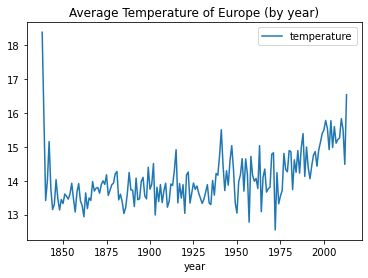

In [26]:
country = 'Europe'
# df_country = df_country[df_country['country'] == country].sort_values(by=['dt'], ascending=True)
df_country = df_country.replace(to_replace='', value = np.nan,regex=True)
df_country = df_country.dropna()
df_country['year'] = df_country['dt'].str[:4].astype(int)
df_country['averagetemperature'] = df_country['averagetemperature'].astype(float)
df_country['temperature'] = df_country.groupby('year')['averagetemperature'].transform('mean')
df_country.drop_duplicates(
    subset=["year"], keep="first"
).plot(
    x="year", y="temperature", kind="line", title="Average Temperature of " + country + ' (by year)'
)

<AxesSubplot:title={'center':'Average Temperature of India (by year)'}, xlabel='year'>

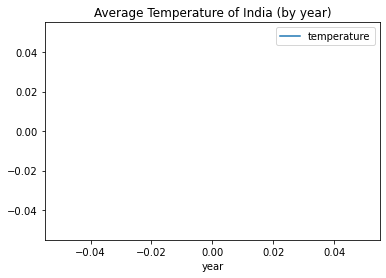

In [27]:
country = 'India'
df_country = df_country[df_country['country'] == country].sort_values(by=['dt'], ascending=True)
df_country = df_country.replace(to_replace='', value = np.nan,regex=True)
df_country = df_country.dropna()
df_country['year'] = df_country['dt'].str[:4].astype(int)
df_country['averagetemperature'] = df_country['averagetemperature'].astype(float)
df_country['temperature'] = df_country.groupby('year')['averagetemperature'].transform('mean')
df_country.drop_duplicates(
    subset=["year"], keep="first"
).plot(
    x="year", y="temperature", kind="line", title="Average Temperature of " + country + ' (by year)'
)

### Question 2: For a given year and a given city/country, what is the max/min temperature?

### Question 3: For a given year, which city/country has the highest/lowest temperature on average?

### Question 4: For a given city/country, what is the initial and the most recent temperature?